In this notebook, we will be building our model for the closed-world experiments to classify 95 monitored websites

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Extracting Data

To begin, we will first import the dataframes into this notebook

In [2]:
with open('datasets/extracted_features.pkl', 'rb') as f:
    extracted_df = pickle.load(f)

In [3]:
extracted_df

,label,incoming_packet_counts,outgoing_packet_counts,total_packet_counts,incoming_packet_fraction,outgoing_packet_fraction,std_outgoing_order,avg_outgoing_order,sum_concentration,avg_concentration
0,0,1300,121,1421,0.914849,0.085151,515.483953,773.322314,10.14,0.007136
1,0,438,80,518,0.845560,0.154440,139.231951,226.162500,10.16,0.019614
2,0,1240,118,1358,0.913108,0.086892,472.735508,786.110169,11.11,0.008181
3,0,1324,122,1446,0.915629,0.084371,513.916038,820.139344,13.36,0.009239
4,0,1291,115,1406,0.918208,0.081792,503.993490,789.608696,10.64,0.007568
...,...,...,...,...,...,...,...,...,...,...
28995,-1,4180,413,4593,0.910081,0.089919,1173.380403,2549.414044,32.09,0.006987
28996,-1,4663,447,5110,0.912524,0.087476,1621.869237,3062.015660,38.62,0.007558
28997,-1,302,59,361,0.836565,0.163435,118.245320,179.101695,34.93,0.096759
28998,-1,413,96,509,0.811395,0.188605,166.667122,309.197917,11.84,0.023261


In this notebook, since we will only be dealing with the closed world experiments, we will first extract the relevant data from the dataframe

In [4]:
closed_world_df = extracted_df[extracted_df['label'] != -1]

In [5]:
closed_world_df

,label,incoming_packet_counts,outgoing_packet_counts,total_packet_counts,incoming_packet_fraction,outgoing_packet_fraction,std_outgoing_order,avg_outgoing_order,sum_concentration,avg_concentration
0,0,1300,121,1421,0.914849,0.085151,515.483953,773.322314,10.14,0.007136
1,0,438,80,518,0.845560,0.154440,139.231951,226.162500,10.16,0.019614
2,0,1240,118,1358,0.913108,0.086892,472.735508,786.110169,11.11,0.008181
3,0,1324,122,1446,0.915629,0.084371,513.916038,820.139344,13.36,0.009239
4,0,1291,115,1406,0.918208,0.081792,503.993490,789.608696,10.64,0.007568
...,...,...,...,...,...,...,...,...,...,...
18995,94,8815,619,9434,0.934386,0.065614,3053.116218,4844.586430,43.91,0.004654
18996,94,9404,552,9956,0.944556,0.055444,3010.091146,4541.974638,15.60,0.001567
18997,94,9373,579,9952,0.941821,0.058179,3102.381602,4766.072539,14.93,0.001500
18998,94,9236,690,9926,0.930486,0.069514,3116.574388,5278.146377,19.91,0.002006


Next, we separate the features and the target. Target will be label which represents the label of the monitored websites. Features will be the remaining columns.

In [6]:
X = closed_world_df.drop(columns=['label'])
y = closed_world_df['label']

# Feature Importance

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [8]:
df = pd.DataFrame(X_train)

In [9]:
df.head()

,incoming_packet_counts,outgoing_packet_counts,total_packet_counts,incoming_packet_fraction,outgoing_packet_fraction,std_outgoing_order,avg_outgoing_order,sum_concentration,avg_concentration
16435,6764,786,7550,0.895894,0.104106,2274.373780,4363.656489,56.65,0.007503
10318,7752,548,8300,0.933976,0.066024,2275.203714,3655.810219,27.46,0.003308
18220,9633,354,9987,0.964554,0.035446,3042.146790,4614.615819,10.57,0.001058
1069,2231,312,2543,0.877310,0.122690,920.579727,1355.676282,25.22,0.009917
2923,710,46,756,0.939153,0.060847,291.187573,368.717391,11.27,0.014907


In [10]:
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=0)
clf.fit(X_train, y_train)
feature_imp = pd.Series(clf.feature_importances_, index=df.columns).sort_values(ascending=False)

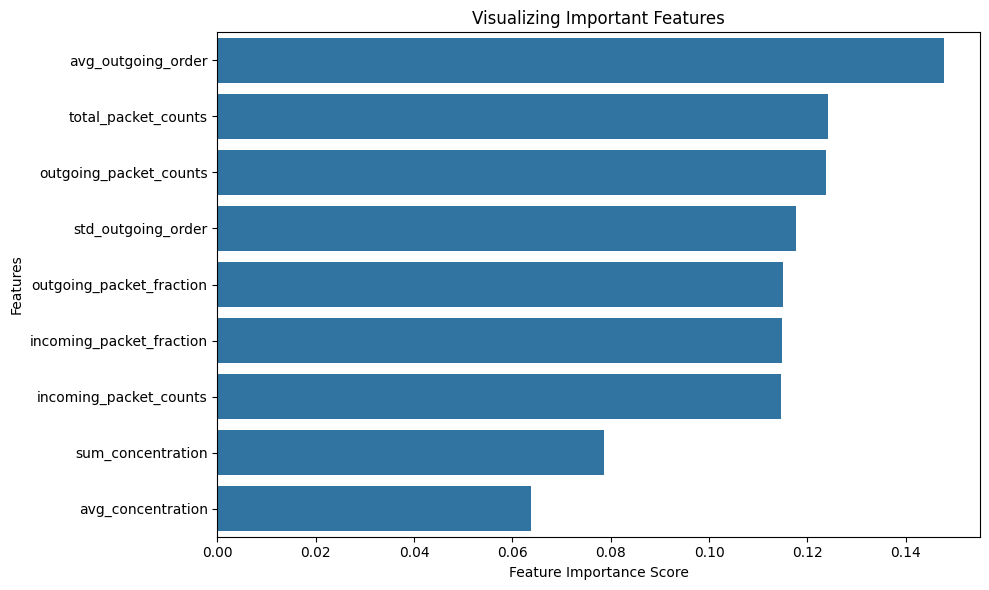

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

Recall the extracted features:
> **Feature Group 1: Traffic Volume (Absolute)**  
> - Feature 1: Number of incoming packets  
> - Feature 2: Number of outgoing packets  
> - Feature 3: Total number of packets  
> 
> **Feature Group 2: Traffic Volume (Fraction)**
> - Feature 1: Number of incoming packets as a fraction of the total number of packets  
> - Feature 2: Number of outgoing packets as a fraction of the total number of packets 
> 
> **Feature Group 3: Traffic Ordering List**
> - Feature 6: Standard deviation of the outgoing packets ordering list  
> - Feature 7: Average of the outgoing packets ordering list  
> 
> **Feature Group 4: Traffic concentration** 
> - Feature 8: Sum of all items in the alternative concentration feature list  
> - Feature 9: Average of all items in the alternative concentration feature list  

We noted that within each of the 4 feature groups, the features are likely to be highly correlated due to their similarity. Furthermore, feature groups 1 and 2 are closely related as well with 1 being an absolute measurement of traffic volume and 2 as the ratio. Hence we will be selecting 2 features from the combination of group 1 and 2, and 1 feature each from group 3 and 4.

According to our feature importance analysis, we have selected the features to be
1. Feature 2: Number of outgoing packets   
2. Feature 3: Total number of packets
3. Feature 7: Average of the outgoing packets ordering list 
4. Feature 8: Sum of all items in the alternative concentration feature list  

In [12]:
X = closed_world_df[['outgoing_packet_counts', 'total_packet_counts', 'avg_outgoing_order', 'sum_concentration']]
y = closed_world_df['label']

# Constructing Model

In this section, we construct an arbitrary random forest classification model using arbitrarily chosen parameters. This section aims to explore the implementation of the model. These parameters will be tuned in the next section. 

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [14]:
df = pd.DataFrame(X_train)

In [15]:
df.head()

,outgoing_packet_counts,total_packet_counts,avg_outgoing_order,sum_concentration
16435,786,7550,4363.656489,56.65
10318,548,8300,3655.810219,27.46
18220,354,9987,4614.615819,10.57
1069,312,2543,1355.676282,25.22
2923,46,756,368.717391,11.27


In [16]:
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [17]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.6832


In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.74      0.65        38
           1       0.59      0.48      0.53        42
           2       0.85      0.83      0.84        41
           3       0.78      0.78      0.78        40
           4       0.57      0.77      0.66        30
           5       0.77      0.69      0.73        35
           6       0.74      0.85      0.79        33
           7       0.67      0.70      0.68        43
           8       0.76      0.81      0.78        36
           9       0.67      0.71      0.69        52
          10       0.66      0.61      0.64        44
          11       0.59      0.65      0.62        40
          12       0.79      0.87      0.83        39
          13       0.51      0.46      0.49        41
          14       0.58      0.58      0.58        33
          15       0.67      0.72      0.70        40
          16       0.77      0.69      0.73        35
          17       0.48    

# Model Tuning

In [19]:
param_grid_random = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=0), 
    param_distributions=param_grid_random, 
    n_iter=50, 
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_random_params = random_search.best_params_
print("Best parameters from RandomizedSearchCV:", best_random_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\betti\Desktop\Bettina\School\ntu\y3s1 - exchange\Machine Learning\team project\github\neurotic_networkers\.venv\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters from RandomizedSearchCV: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}


In [20]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy']           
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0), 
    param_grid=param_grid, 
    cv=5,  
    refit=True, 
    verbose = 3,
    n_jobs=-1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


c:\Users\betti\Desktop\Bettina\School\ntu\y3s1 - exchange\Machine Learning\team project\github\neurotic_networkers\.venv\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 15],
                         'n_estimators': [100, 150, 200]},
             verbose=3)

In [21]:
# print best parameters after grid search
print(grid.best_params_)

# print how the best model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=200, random_state=0)


In [22]:
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8407
Test Accuracy: 0.6645


In [23]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.71      0.68        38
           1       0.65      0.36      0.46        42
           2       0.72      0.80      0.76        41
           3       0.69      0.68      0.68        40
           4       0.66      0.83      0.74        30
           5       0.70      0.66      0.68        35
           6       0.72      0.85      0.78        33
           7       0.58      0.72      0.65        43
           8       0.68      0.78      0.73        36
           9       0.70      0.73      0.72        52
          10       0.65      0.45      0.53        44
          11       0.59      0.57      0.58        40
          12       0.80      0.90      0.84        39
          13       0.52      0.41      0.46        41
          14       0.61      0.52      0.56        33
          15       0.62      0.70      0.66        40
          16       0.86      0.71      0.78        35
          17       0.55    